In [1]:
import warnings

warnings.simplefilter("ignore")
import numpy as np

np.seterr(all="ignore")

# %%capture
import matplotlib.pyplot as plt
from pathlib import Path
from threeML import *
from threeML.io.package_data import get_path_of_data_file

# we will need XPSEC models for extinction
from astromodels.xspec import *
from astromodels.xspec.xspec_settings import *

from jupyterthemes import jtplot

%matplotlib inline
jtplot.style(context="talk", fscale=1, ticks=True, grid=False)
set_threeML_style()
silence_warnings()

17:05:37 WARNING   The GSL library or the pygsl wrapper cannot be loaded. Models that depend on it  ]8;id=959918;file:///home/arpan-john/anaconda3/envs/threeml/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py\functions.py]8;;\:]8;id=847148;file:///home/arpan-john/anaconda3/envs/threeml/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py#69\69]8;;\
                  will not be available.                                                                           

17:05:38 INFO      Starting 3ML!                                                                     ]8;id=459815;file:///home/arpan-john/anaconda3/envs/threeml/lib/python3.9/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=271558;file:///home/arpan-john/anaconda3/envs/threeml/lib/python3.9/site-packages/threeML/__init__.py#39\39]8;;\

         WARNING   WARNINGs here are NOT errors                                                      ]8;id=149216;file:///home/arpan-john/anaconda3/envs/threeml/lib/python3.9/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=782869;file:///home/arpan-john/anaconda3/envs/threeml/lib/python3.9/site-packages/threeML/__init__.py#40\40]8;;\

         WARNING   but are inform you about optional packages that can be installed                  ]8;id=166643;file:///home/arpan-john/anaconda3/envs/threeml/lib/python3.9/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=59456;file:///home/arpan-john/anaconda3/envs/threeml/lib/python3.9/site-packages/threeML/__init__.py#41\41]8;;\

         WARNING    to disable these messages, turn off start_warning in your config file            ]8;id=572637;file:///home/arpan-john/anaconda3/envs/threeml/lib/python3.9/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=540702;file:///home/arpan-john/anaconda3/envs/threeml/lib/python3.9/site-packages/threeML/__init__.py#44\44]8;;\

17:05:38 WARNING   ROOT minimizer not available                                                ]8;id=583359;file:///home/arpan-john/anaconda3/envs/threeml/lib/python3.9/site-packages/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=397463;file:///home/arpan-john/anaconda3/envs/threeml/lib/python3.9/site-packages/threeML/minimizer/minimization.py#1345\1345]8;;\

         WARNING   Multinest minimizer not available                                           ]8;id=999340;file:///home/arpan-john/anaconda3/envs/threeml/lib/python3.9/site-packages/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=736242;file:///home/arpan-john/anaconda3/envs/threeml/lib/python3.9/site-packages/threeML/minimizer/minimization.py#1357\1357]8;;\

         WARNING   The cthreeML package is not installed. You will not be able to use plugins which  ]8;id=657788;file:///home/arpan-john/anaconda3/envs/threeml/lib/python3.9/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=318929;file:///home/arpan-john/anaconda3/envs/threeml/lib/python3.9/site-packages/threeML/__init__.py#94\94]8;;\
                  require the C/C++ interface (currently HAWC)                                                     

         WARNING   Could not import plugin HAWCLike.py. Do you have the relative instrument         ]8;id=320966;file:///home/arpan-john/anaconda3/envs/threeml/lib/python3.9/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=547159;file:///home/arpan-john/anaconda3/envs/threeml/lib/python3.9/site-packages/threeML/__init__.py#144\144]8;;\
                  software installed and configured?                                                               

Loading xspec models...done


In [8]:
dir = '/home/arpan-john/Desktop/GC6/current'

import os
import glob
from Calculating_det_angles import estimate_source_angles_detectors  # Importing ma'am's function
from astropy.io import fits

# Finding Trigdat file
trig_string = "_trigdat_"
trig_pattern = os.path.join(dir, f"*{trig_string}*")
trigdat_file = glob.glob(trig_pattern)

print(trigdat_file)

for s in trigdat_file[0].split('_'):
    if 'bn' in s:
        trigger = s
        break
print(trigger)

# Getting the RA and DEC
with fits.open(trigdat_file[0], memmap=True) as pha_list:
    ra_obj, dec_obj = (pha_list[0].header['RA_OBJ']), (pha_list[0].header['DEC_OBJ'])

brightest_nai, bright_nais, brightest_bgo = estimate_source_angles_detectors.angle_to_grb(ra_obj, dec_obj,trigdat_file[0])

print(brightest_nai)
print(bright_nais)
print(brightest_bgo)

# Finding TTE files
tte_string = "_tte_"
tte_pattern = os.path.join(dir, f"*{tte_string}*")
tte_files = glob.glob(tte_pattern)
tte_files.sort()
print(tte_files)

# Finding rsp files
rsp_string = ".rsp"
rsp_pattern = os.path.join(dir, f"*{rsp_string}*")
rsp_files = glob.glob(rsp_pattern)

for file in rsp_files:
    if 'ctime' in file:
        rsp_files.remove(file)
        continue
    if 'ctime' in file.split('_'):
        rsp_files.remove(file)
        
rsp_files.sort()
print(rsp_files)


['/home/arpan-john/Desktop/GC6/current/glg_trigdat_all_bn130205970_v01.fit']
bn130205970
 
The brightest NaI detector is n5 - Source angle is: 72 deg
The brightest 3 NaI detectors are n5 ( 72 deg) n4 ( 89 deg) na ( 91 deg)
The brightest BGO detector is b0 ( 73 deg )
n5
['n5', 'n4', 'na']
['b0']
['/home/arpan-john/Desktop/GC6/current/glg_tte_b0_bn130205970_v00.fit', '/home/arpan-john/Desktop/GC6/current/glg_tte_b1_bn130205970_v00.fit', '/home/arpan-john/Desktop/GC6/current/glg_tte_n0_bn130205970_v00.fit', '/home/arpan-john/Desktop/GC6/current/glg_tte_n1_bn130205970_v00.fit', '/home/arpan-john/Desktop/GC6/current/glg_tte_n2_bn130205970_v00.fit', '/home/arpan-john/Desktop/GC6/current/glg_tte_n3_bn130205970_v00.fit', '/home/arpan-john/Desktop/GC6/current/glg_tte_n4_bn130205970_v00.fit', '/home/arpan-john/Desktop/GC6/current/glg_tte_n5_bn130205970_v00.fit', '/home/arpan-john/Desktop/GC6/current/glg_tte_n6_bn130205970_v00.fit', '/home/arpan-john/Desktop/GC6/current/glg_tte_n7_bn130205970_v00

In [9]:
NaI_detectors = []
rsp_NaI_files = []
rsp2_NaI_files = []
for nai in bright_nais:
    for file in rsp_files:
        if 'ctime' in file:
            rsp_files.remove(file)
            continue
        elif brightest_bgo[0] in file and 'rsp2' in file:
            rsp2_BGO_file = [file]
            continue
        elif brightest_bgo[0] in file and 'rsp' in file:
            rsp_BGO_file = [file]
            continue
        elif nai in file and 'rsp2' in file:
            rsp2_NaI_files.append(file)
            continue
        elif nai in file and 'rsp' in file:
            rsp_NaI_files.append(file)
    for file in tte_files:
        if brightest_bgo[0] in file:
            BGO_detector = [file]
        if nai in file:
            NaI_detectors.append(file)
            break

print(NaI_detectors)
print(BGO_detector)
print(rsp_NaI_files)
print(rsp2_NaI_files)
print(rsp_BGO_file)
try:
    print(rsp2_BGO_file)
except:
    print('no rsp2 file')

tte_file = NaI_detectors[0]
with fits.open(tte_file, memmap=True) as hdul:
    all_count_data = hdul[2].data
    trigtime = hdul[2].header['TRIGTIME']

counts = all_count_data['TIME'].astype(float) - trigtime
cmin = counts.min()
cmax = counts.max()
print(f"Earliest count {cmin:.2f}, latest count {cmax:.2f}")

['/home/arpan-john/Desktop/GC6/current/glg_tte_n5_bn130205970_v00.fit', '/home/arpan-john/Desktop/GC6/current/glg_tte_n4_bn130205970_v00.fit', '/home/arpan-john/Desktop/GC6/current/glg_tte_na_bn130205970_v00.fit']
['/home/arpan-john/Desktop/GC6/current/glg_tte_b0_bn130205970_v00.fit']
['/home/arpan-john/Desktop/GC6/current/glg_cspec_n5_bn130205970_v00.rsp', '/home/arpan-john/Desktop/GC6/current/glg_cspec_n4_bn130205970_v00.rsp', '/home/arpan-john/Desktop/GC6/current/glg_cspec_na_bn130205970_v00.rsp']
[]
['/home/arpan-john/Desktop/GC6/current/glg_cspec_b0_bn130205970_v00.rsp']
['/home/arpan-john/Desktop/GRB1/current/glg_cspec_b0_bn080916009_v00.rsp2']
Earliest count -138.24, latest count 476.17


In [10]:
# set background interval
background_interval = ["-25 - -5","100 - 300"]

Finding best polynomial Order:   0%|          | 0/4 [00:00<?, ?it/s]

Fitting GBM_NAI_04 background:   0%|          | 0/128 [00:00<?, ?it/s]

222.2066159706119
223.2306159706119
may be a short GRB
[222.2066159706119, 223.2306159706119]


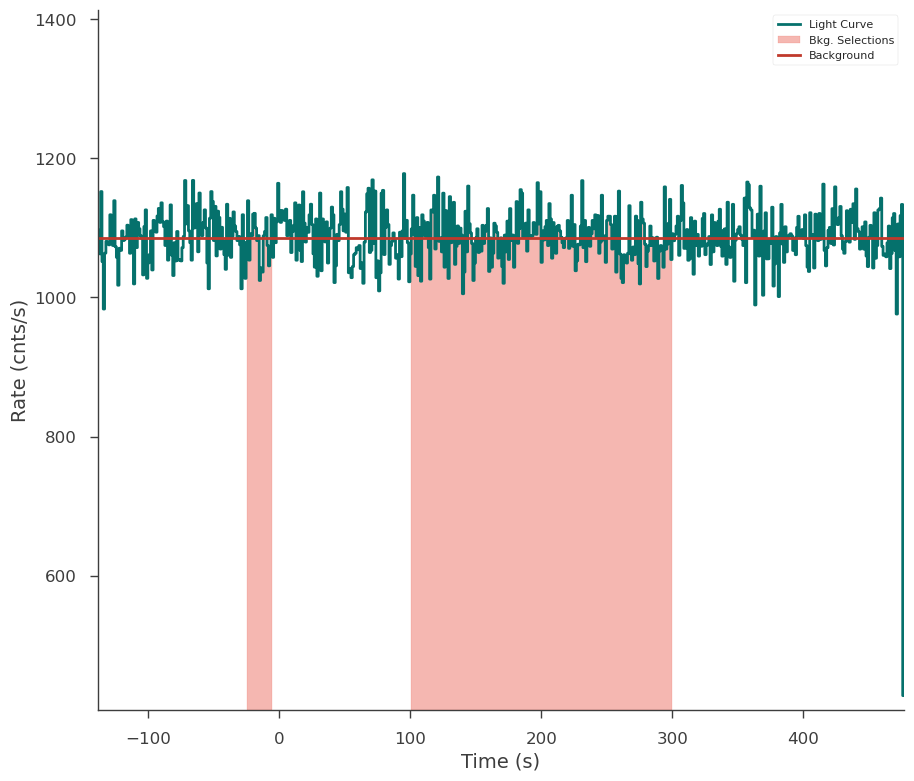

In [11]:
def find_act_inv(ts,cmin=cmin,cmax=cmax,type = 'long'):

    if type == 'long':
        dt = 1.024
    else:
        dt = 0.064
    ts.create_time_bins(start=cmin, stop=cmax, method='constant',dt = dt)
    skip = 0
    flag = 0
    for sig,tot,bins in zip (ts.significance_per_interval[skip:],ts.total_counts_per_interval[skip:],ts.bins[skip:]):
        if sig > 3.5:
            pass
            # print(tot,sig,bins)        
        bins = str(bins)
        if sig > 3.5 and flag == 0:
            start = float(bins.split(' ')[2])
            flag = 1
        if sig < 3.5 and flag == 1:
            stop = float(bins.split(' ')[2])
            break
    if flag == 1:
        print(start)
        print(stop)
    else:
        print('no active interval')
        return None,None
    if (stop - start) < 2 and type == 'long':
        print('may be a short GRB')
    return start,stop


temp_ts = TimeSeriesBuilder.from_gbm_tte(
        'temp', 
        tte_file=NaI_detectors[1], 
        rsp_file=rsp_NaI_files[1])
temp_ts.set_background_interval(*background_interval)
fig = temp_ts.view_lightcurve(cmin, cmax)
start , stop = find_act_inv(temp_ts)
print([start, stop])
temp_ts=0
# set interval
source_interval = f'{start:.2f} - {stop:.2f}'

detector n5


Finding best polynomial Order:   0%|          | 0/4 [00:00<?, ?it/s]

Fitting GBM_NAI_05 background:   0%|          | 0/128 [00:00<?, ?it/s]

detector n4


Finding best polynomial Order:   0%|          | 0/4 [00:00<?, ?it/s]

Fitting GBM_NAI_04 background:   0%|          | 0/128 [00:00<?, ?it/s]

detector na


Finding best polynomial Order:   0%|          | 0/4 [00:00<?, ?it/s]

Fitting GBM_NAI_10 background:   0%|          | 0/128 [00:00<?, ?it/s]

detector b0


Finding best polynomial Order:   0%|          | 0/4 [00:00<?, ?it/s]

Fitting GBM_BGO_00 background:   0%|          | 0/128 [00:00<?, ?it/s]

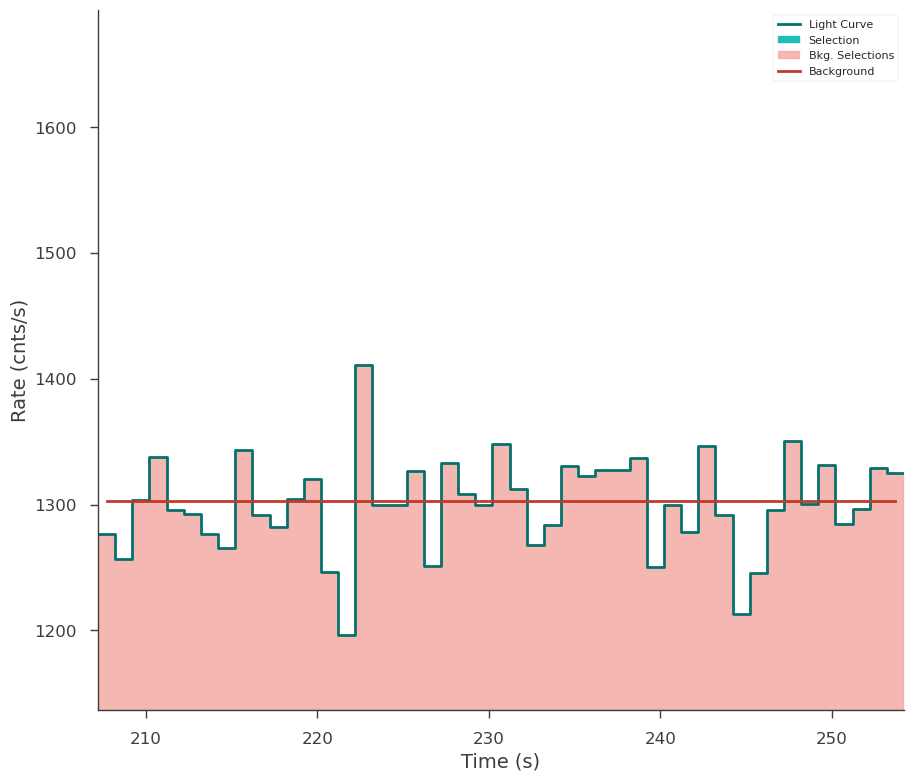

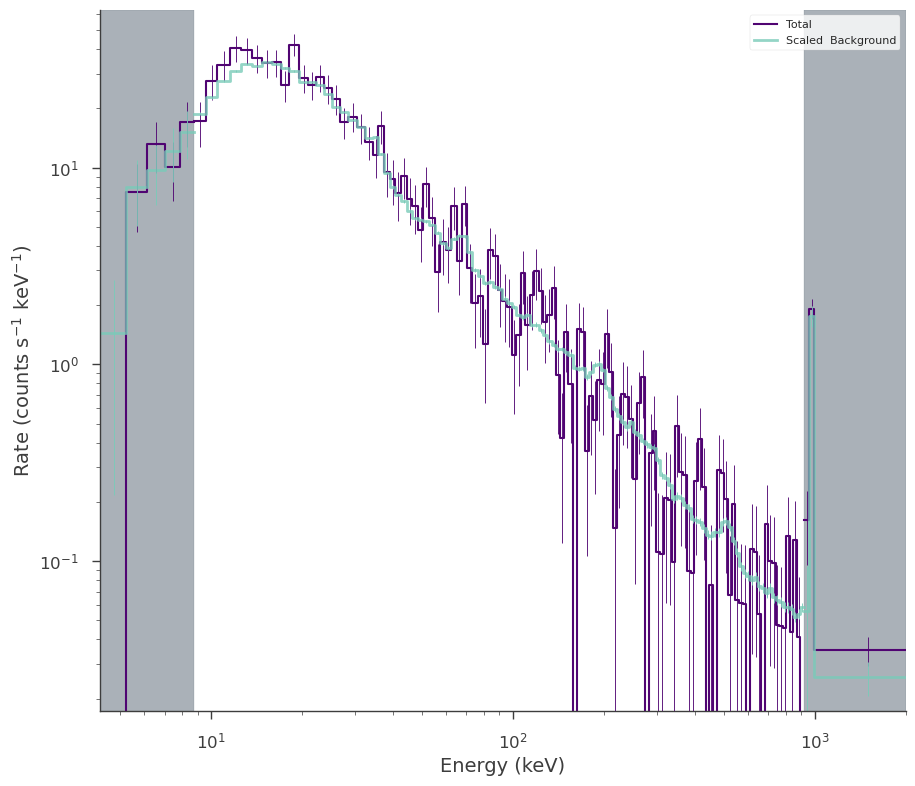

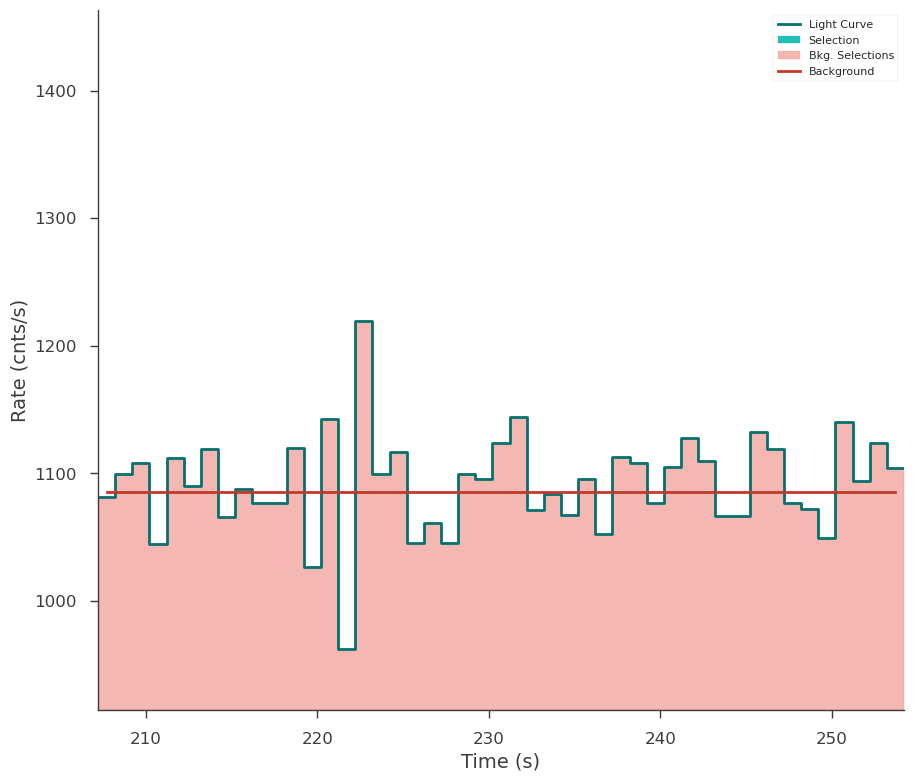

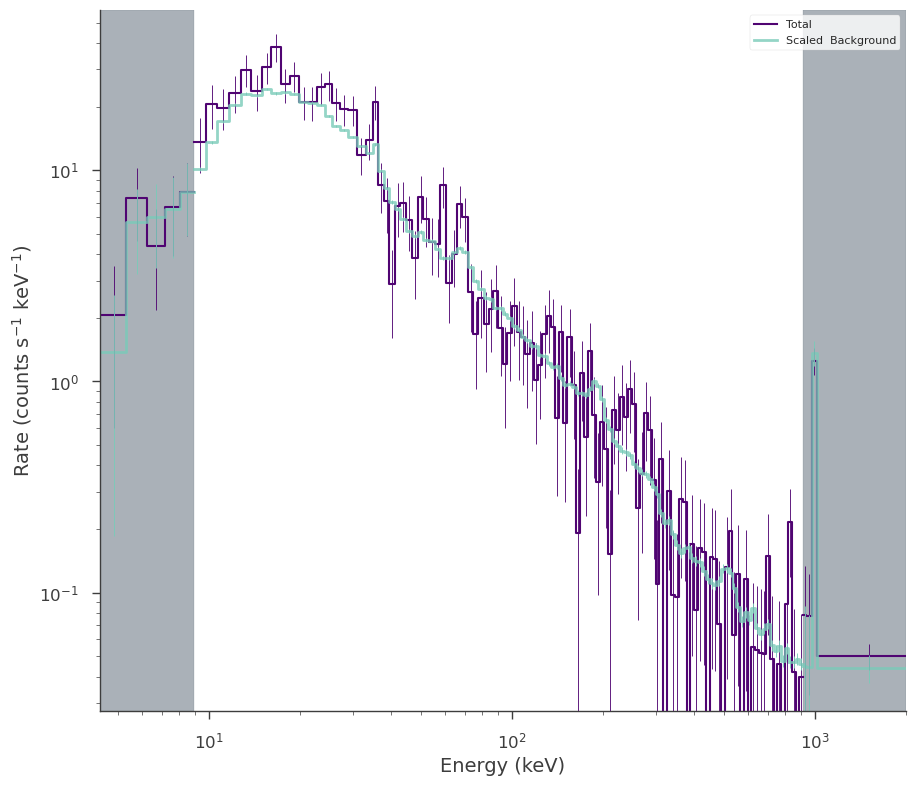

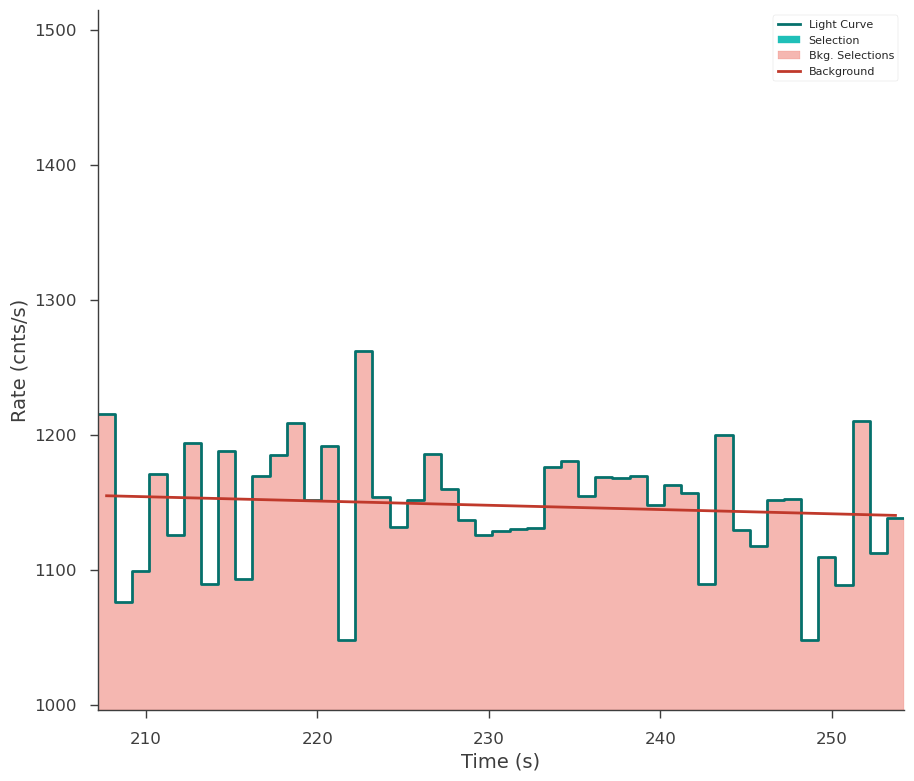

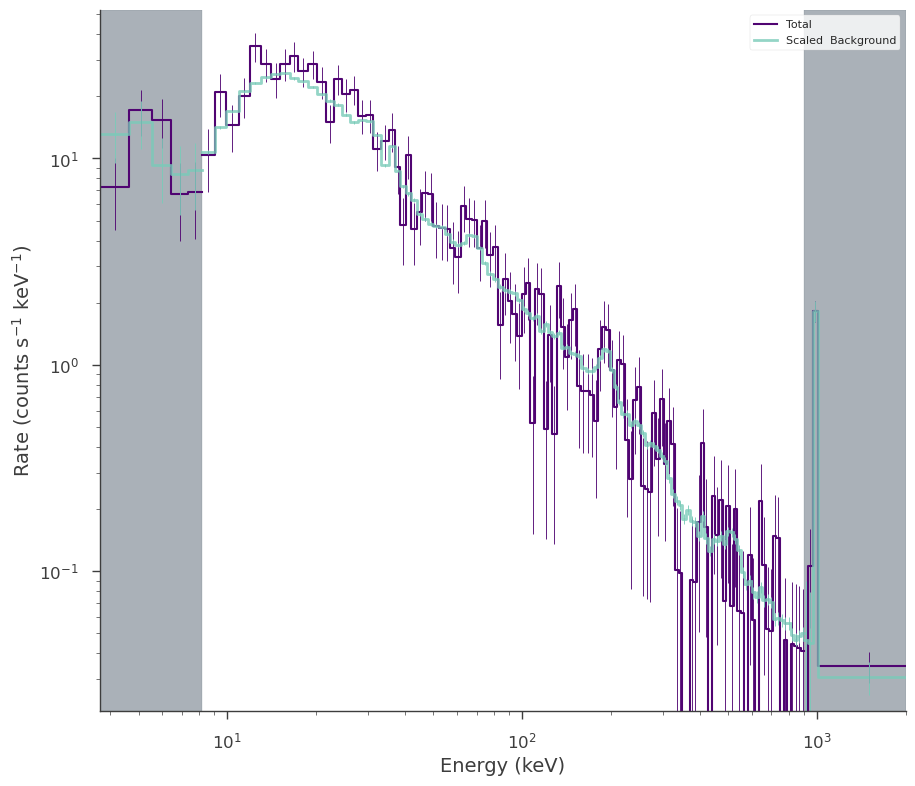

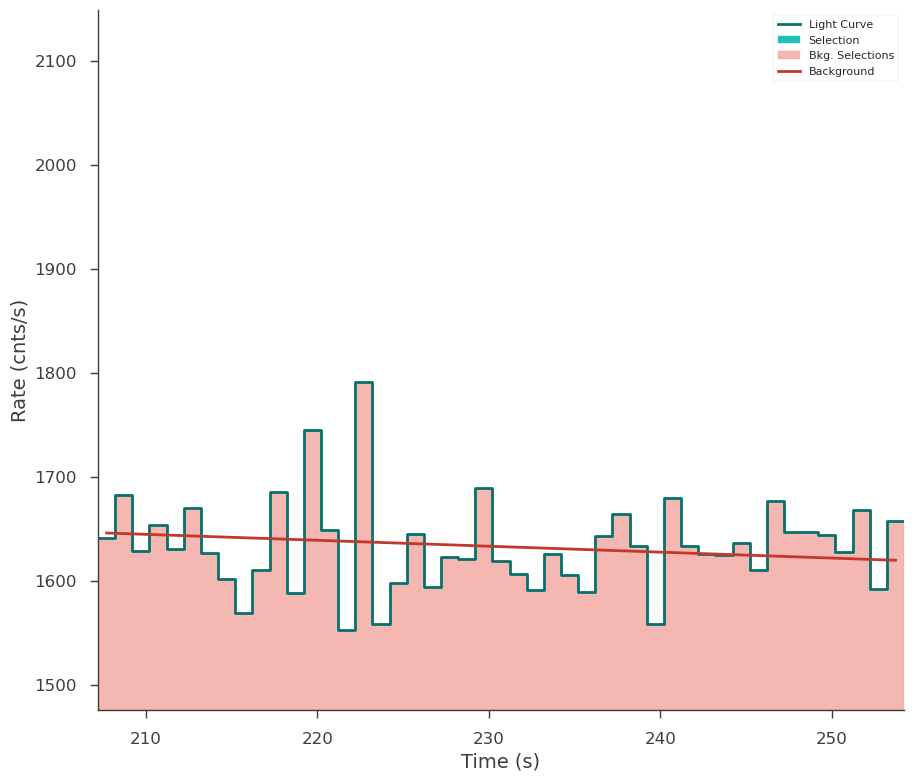

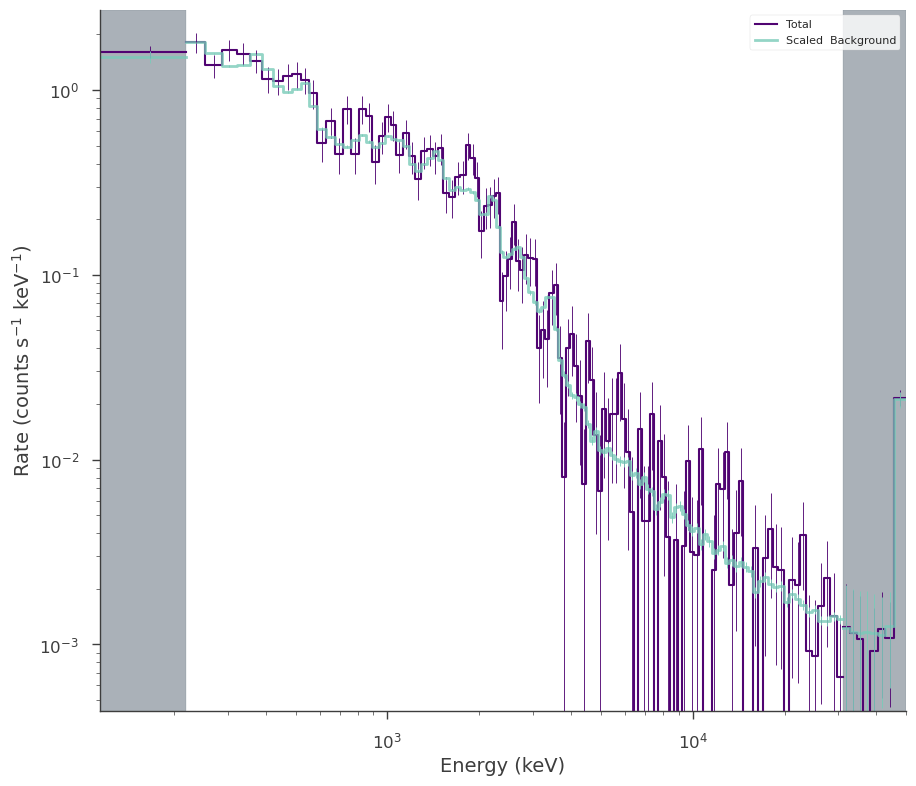

In [12]:
from threeML import (
    silence_logs,
    silence_warnings,
    activate_logs,
    activate_warnings,
    update_logging_level,
)
import logging
silence_logs()

fluence_plugins = []
time_series = {}
for det,rsp in zip((NaI_detectors + BGO_detector),(rsp_NaI_files+rsp_BGO_file)):
    det_name = det.split('_')[-3]
    print('detector',det_name)
    ts = TimeSeriesBuilder.from_gbm_tte(
        det_name, tte_file=det, rsp_file=rsp
    )

    ts.set_background_interval(*background_interval)

    # Bayes block method
    ts.create_time_bins(
        start= start - 10, stop= stop + 20, method="bayesblocks", p0=0.01, use_background=True
    )

    bad_bins = []
    for i, w in enumerate(ts.bins.widths):
        if w < 5e-2:
            bad_bins.append(i)


    edges = [ts.bins.starts[0]]

    for i, b in enumerate(ts.bins):
        if i not in bad_bins:
            edges.append(b.stop)

    starts = edges[:-1]
    stops = edges[1:]


    ts.create_time_bins(starts, stops, method="custom")

    time_series[det_name] = ts

    ts.set_active_time_interval(source_interval)

    fig = ts.view_lightcurve(start - 15, stop= stop +  30)

    fluence_plugin = ts.to_spectrumlike()

    if det_name.startswith("b"):
        fluence_plugin.set_active_measurements("250-30000")

    else:
        fluence_plugin.set_active_measurements("9-900")

    fluence_plugin.rebin_on_background(1.0)

    fig = fluence_plugin.view_count_spectrum()

    fluence_plugins.append(fluence_plugin)


In [13]:
xspec_abund("angr")
activate_logs()

# spectral_model = XS_phabs() * XS_zphabs() * Cutoff_powerlaw_Ep  # Band_grbm() #SmoothlyBrokenPowerLaw() # Powerlaw 
spectral_model = XS_grbm()

# spectral_model.nh_1 = 0.101
# spectral_model.nh_1.bounds = (None, None)
# spectral_model.nh_1.fix = True

# spectral_model.nh_2 = 0.1114424
# spectral_model.nh_2.fix = True
# spectral_model.nh_2.bounds = (None, None)
# spectral_model.redshift_2 = 0.618
# spectral_model.redshift_2.fix = True

# phabs_local = PhAbs(NH=0.101)
# phabs_local.NH.fix = True
# phabs_local.redshift.fix = True
# phabs_src = PhAbs(NH=0.1114424, redshift=0.618)
# phabs_src.NH.fix = True
# phabs_src.redshift.fix = True
# pl = Powerlaw()
# spectral_model_native = phabs_local * phabs_src * pl

ptsrc = PointSource(trigger, ra_obj, dec_obj, spectral_shape=spectral_model)
model = Model(ptsrc)

data = DataList(*fluence_plugins)
# data = DataList(fluence_plugins[0])

jl = JointLikelihood(model, data, verbose=False)
model.display()

 Solar Abundance Vector set to angr:  Anders E. & Grevesse N. Geochimica et Cosmochimica Acta 53, 197 (1989)


Model summary:
==============

                  N
Point sources     1
Extended sources  0
Particle sources  0

Free parameters (4):
--------------------

                                         value min_value max_value  \
bn130205970.spectrum.main.XS_grbm.alpha   -1.0     -10.0       5.0   
bn130205970.spectrum.main.XS_grbm.beta    -2.0     -10.0      10.0   
bn130205970.spectrum.main.XS_grbm.tem    300.0      10.0   10000.0   
bn130205970.spectrum.main.XS_grbm.norm     1.0       0.0      None   

                                                 unit  
bn130205970.spectrum.main.XS_grbm.alpha                
bn130205970.spectrum.main.XS_grbm.beta                 
bn130205970.spectrum.main.XS_grbm.tem             keV  
bn130205970.spectrum.main.XS_grbm.norm   keV s-1 cm-2  

Fixed parameters (6):
(abridged. Use complete=True to see all fixed parameters)


Properties (0):
--------------------

(none)


Linked parameters (0):
----------------------

(none)

Independent variables:
----------------------

(none)

Linked functions (0):
----------------------

(none)

Best fit values:

,result,unit
parameter,,
bn130205970.spectrum.main.XS_grbm.alpha,(-6 +/- 6) x 10^-1,
bn130205970.spectrum.main.XS_grbm.beta,-1.26 +/- 0.32,
bn130205970.spectrum.main.XS_grbm.tem,(1.1 +/- 2.8) x 10,keV
bn130205970.spectrum.main.XS_grbm.norm,(2.1 +/- 2.2) x 10^-2,keV / (s cm2)


Correlation matrix:

1.00,-0.26,0.73,0.45
-0.26,1.00,-0.69,-0.60
0.73,-0.69,1.00,0.29
0.45,-0.60,0.29,1.00


Values of -log(likelihood) at the minimum:

,-log(likelihood)
n5,165.308427
n4,158.048943
na,167.464819
b0,180.397390
total,671.219579


Values of statistical measures:

,statistical measures
AIC,1350.523903
BIC,1367.109223


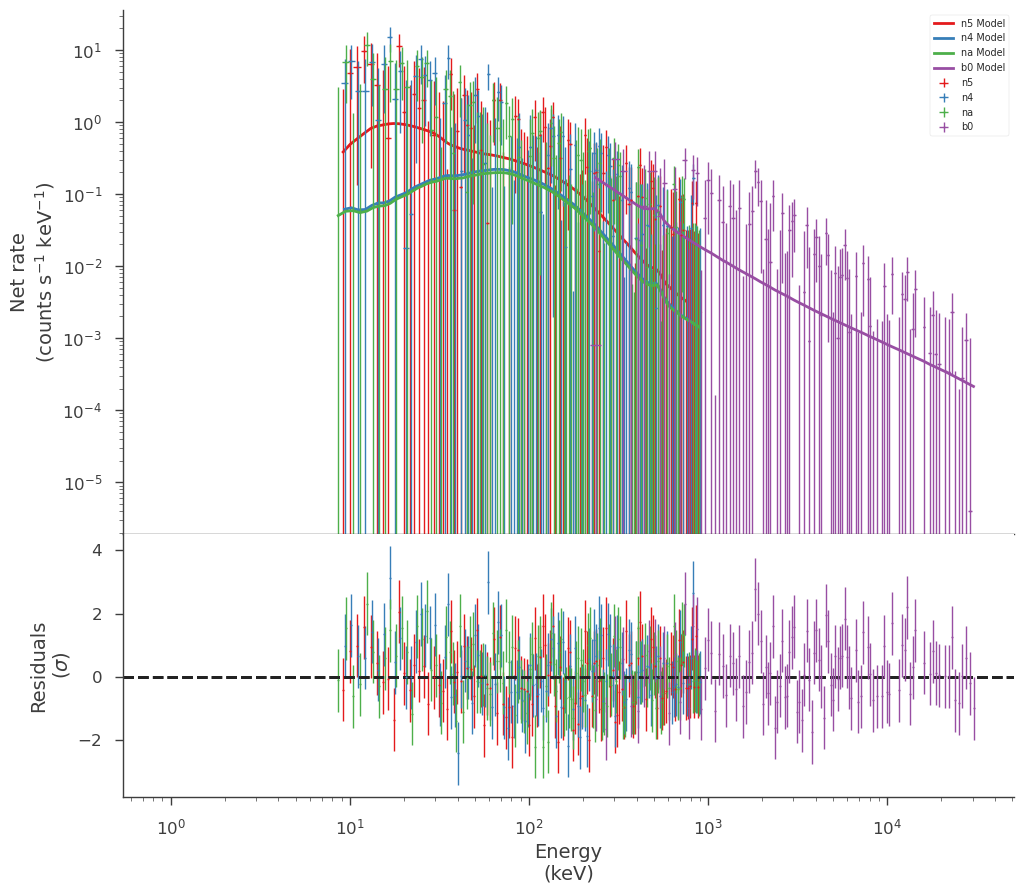

In [14]:
res = jl.fit()
fig = display_spectrum_model_counts(jl)

In [15]:
gof_obj = GoodnessOfFit(jl)

gof, data_frame, like_data_frame = gof_obj.by_mc(
    n_iterations=100, continue_on_failure=True
)

print(gof)

Goodness of fit computation:   0%|          | 0/100 [00:00<?, ?it/s]

OrderedDict([('total', 0.14), ('n5', 0.57), ('n4', 0.07), ('na', 0.56), ('b0', 0.12)])


In [16]:
like_df = res[1]
param_df = res[0]

Goodness of fit (p-value:) 0.14
Meaning that 14.0% of simulations have a larger (worse) likelihood
and 86.0% of simulations have a smaller (better) likelihood than seen in data


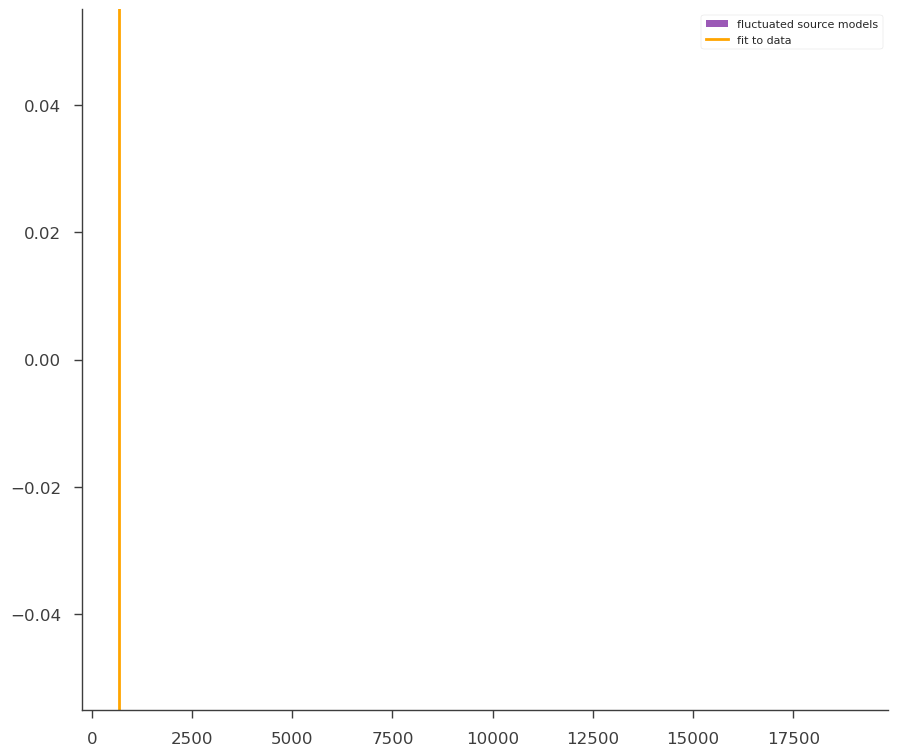

In [17]:
p = gof["total"]

print("Goodness of fit (p-value:)", p)
print(f"Meaning that {100*p:.1f}% of simulations have a larger (worse) likelihood")
print(f"and {100*(1-p):.1f}% of simulations have a smaller (better) likelihood than seen in data")

df = like_data_frame.reset_index()
df = df[df.level_1 == "total"]

fig, ax = plt.subplots()
ax.hist(df["-log(likelihood)"], label = "fluctuated source models", bins=range(18000,19000,50))
ax.axvline(like_df.loc["total","-log(likelihood)"], label = "fit to data", color = "orange" )
ax.xlabel = "-log(likelihood)"
ax.legend(loc="best")

processing MLE analyses:   0%|          | 0/1 [00:00<?, ?it/s]

Propagating errors:   0%|          | 0/50 [00:00<?, ?it/s]

Text(0.5, 0, 'Energy [TeV]')

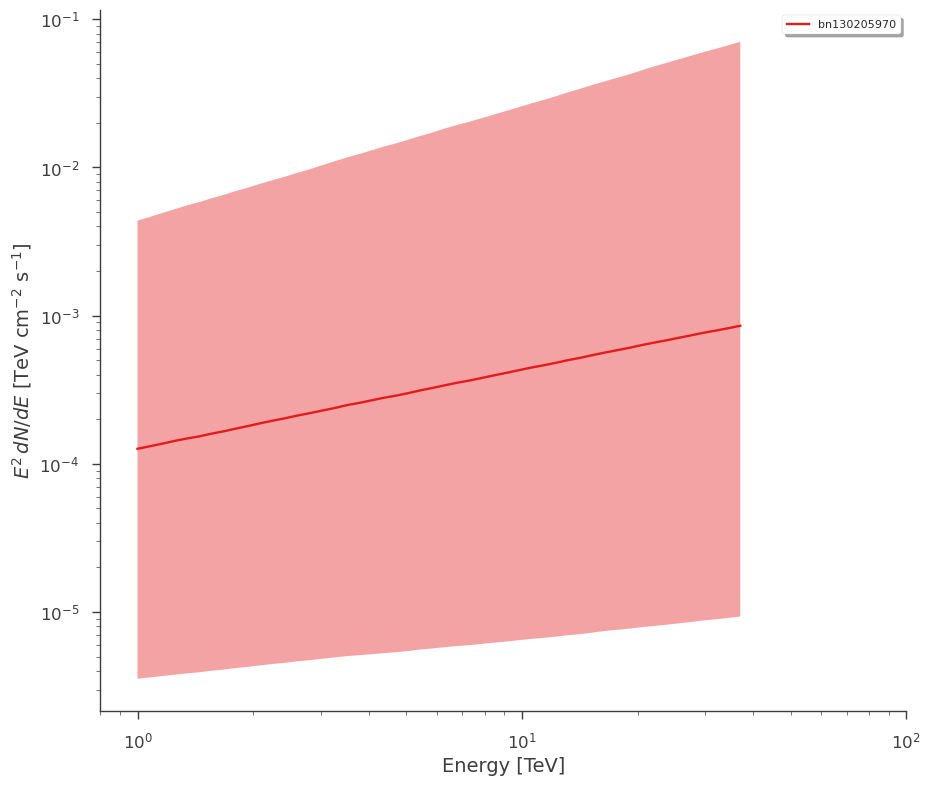

In [18]:
fig, ax = plt.subplots()
results=jl.results
plot_spectra(results,
                   ene_min=1.0,
                   ene_max=37,
                   num_ene=50,
                   energy_unit='TeV',
                   flux_unit='TeV/(s cm2)',
                   subplot = ax)
ax.set_xlim(0.8,100)
ax.set_ylabel(r"$E^2\,dN/dE$ [TeV cm$^{-2}$ s$^{-1}$]")
ax.set_xlabel("Energy [TeV]")

Profiling likelihood:   0%|          | 0/400 [00:00<?, ?it/s]

Profiling likelihood:   0%|          | 0/400 [00:00<?, ?it/s]

ForbiddenRegionOfParameterSpace: 

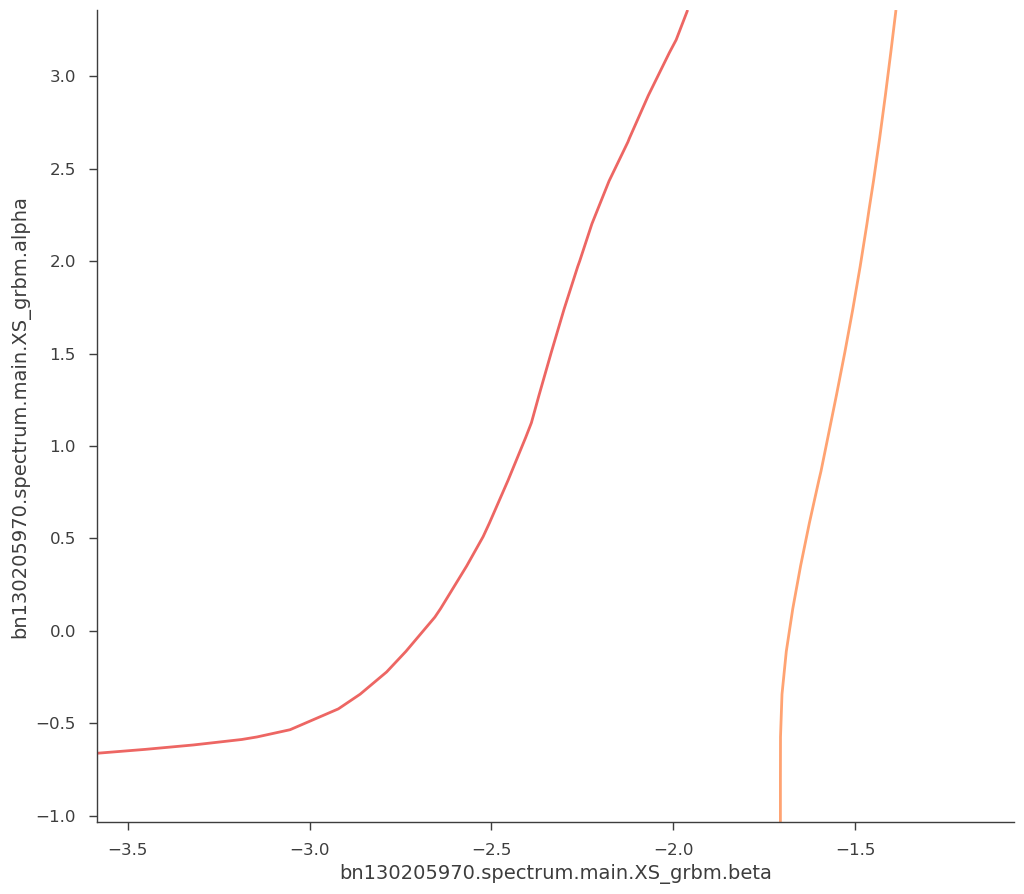

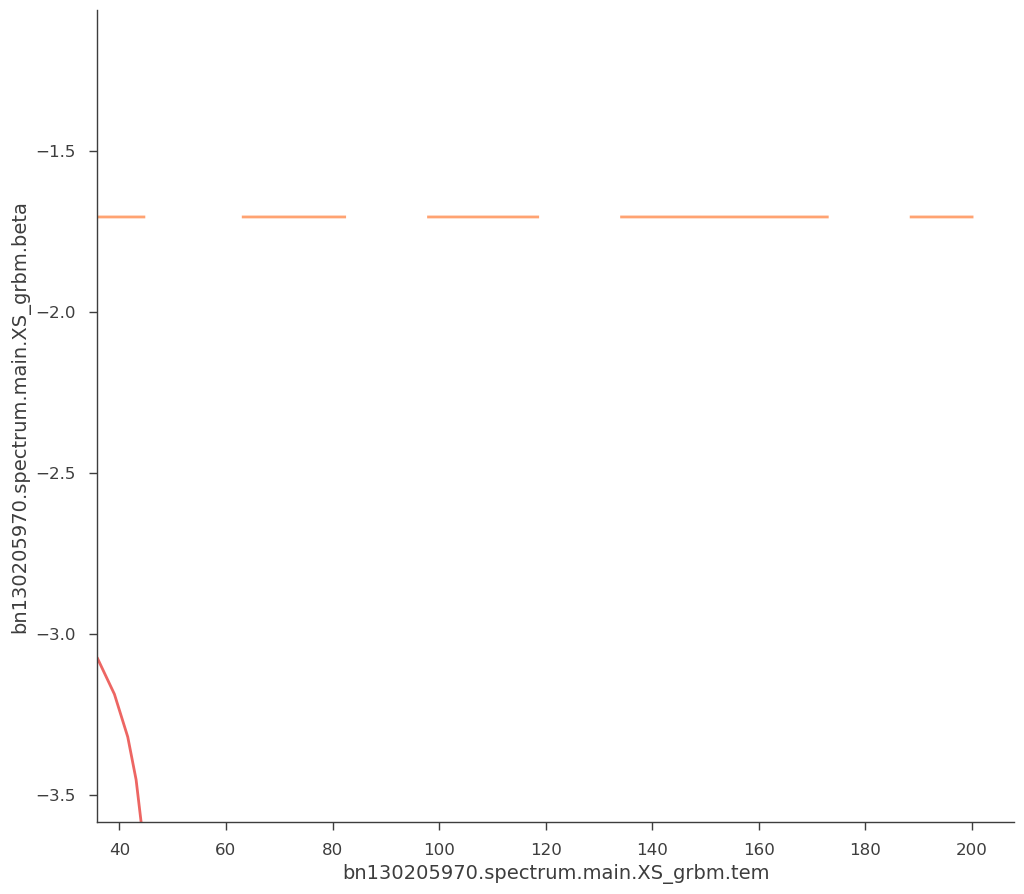

In [19]:
range_min = {}
range_max = {}

params = model.free_parameters
N_param = len(model.free_parameters.keys() )

for name in params:
    row = param_df.loc[name]
    range_min[name] = row["value"] + 5*row["negative_error"]
    range_max[name] = row["value"] + 5*row["positive_error"]

for i in range(0,N_param):
    p1 = list(params.keys())[i]
    p2 = list(params.keys())[(i+1)%N_param]

    a, b, cc, fig = jl.get_contours(p1, range_min[p1], range_max[p1], 20,
                                p2, range_min[p2], range_max[p2], 20 )